In [2]:
#colab에서는 정상동작함

In [ ]:
#관련 라이브러리 불러옴
from flask import Flask
from flask import render_template
from flask import request
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
#mnist dataset 가져옴
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
#라벨 확인
train_labels[0]

5

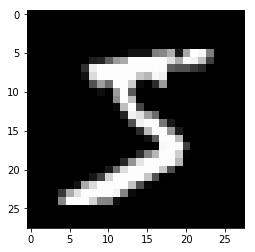

In [5]:
#이미지 출력
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

In [6]:
#데이터 전처리
#(sample수, 가로,세로, 컬러=1) 컬러가 컬라사진이면 RGB로 3이 되어야함 
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255

In [7]:
#쉐이프 확인
print(train_images.shape)
print(test_images.shape)
print(train_images[0].shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28, 1)


In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
#인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
train_labels.shape

(60000, 10)

In [11]:
#라벨값 확인
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#모델링 설계
model = models.Sequential()
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu'))

#classification layers

model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
__________

In [14]:
#모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 학습
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=128,
                   validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


In [ ]:
#정확도 로스률 확인
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
#정확도 그래프 확인
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [ ]:
#로스율 그래프 확인
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
#모델 평가 확인
print(test_loss)
print(test_acc)

In [ ]:
#모델값 파일로 저장
model.save('/content/mnistCNN.h5')